<a href="https://colab.research.google.com/github/AdeebaYusuf/Heart-project/blob/main/Heart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Data collection and processing

In [ ]:
#loading the data to a panda data format
heart_data = pd.read_csv('/heart.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#print first five rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#print last 5 rows of the data set
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checkimg for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# finding duplicate values in the data set
heart_data[heart_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Removing duplicate values

In [ ]:
heart_data.drop_duplicates(inplace=True)

In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


finding some statistical measures of the data

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of target variables
heart_data['target'].value_counts()

,count
target,
1,165
0,138


Creating a scatterplot matrix of the dataset

<Figure size 3000x3000 with 0 Axes>

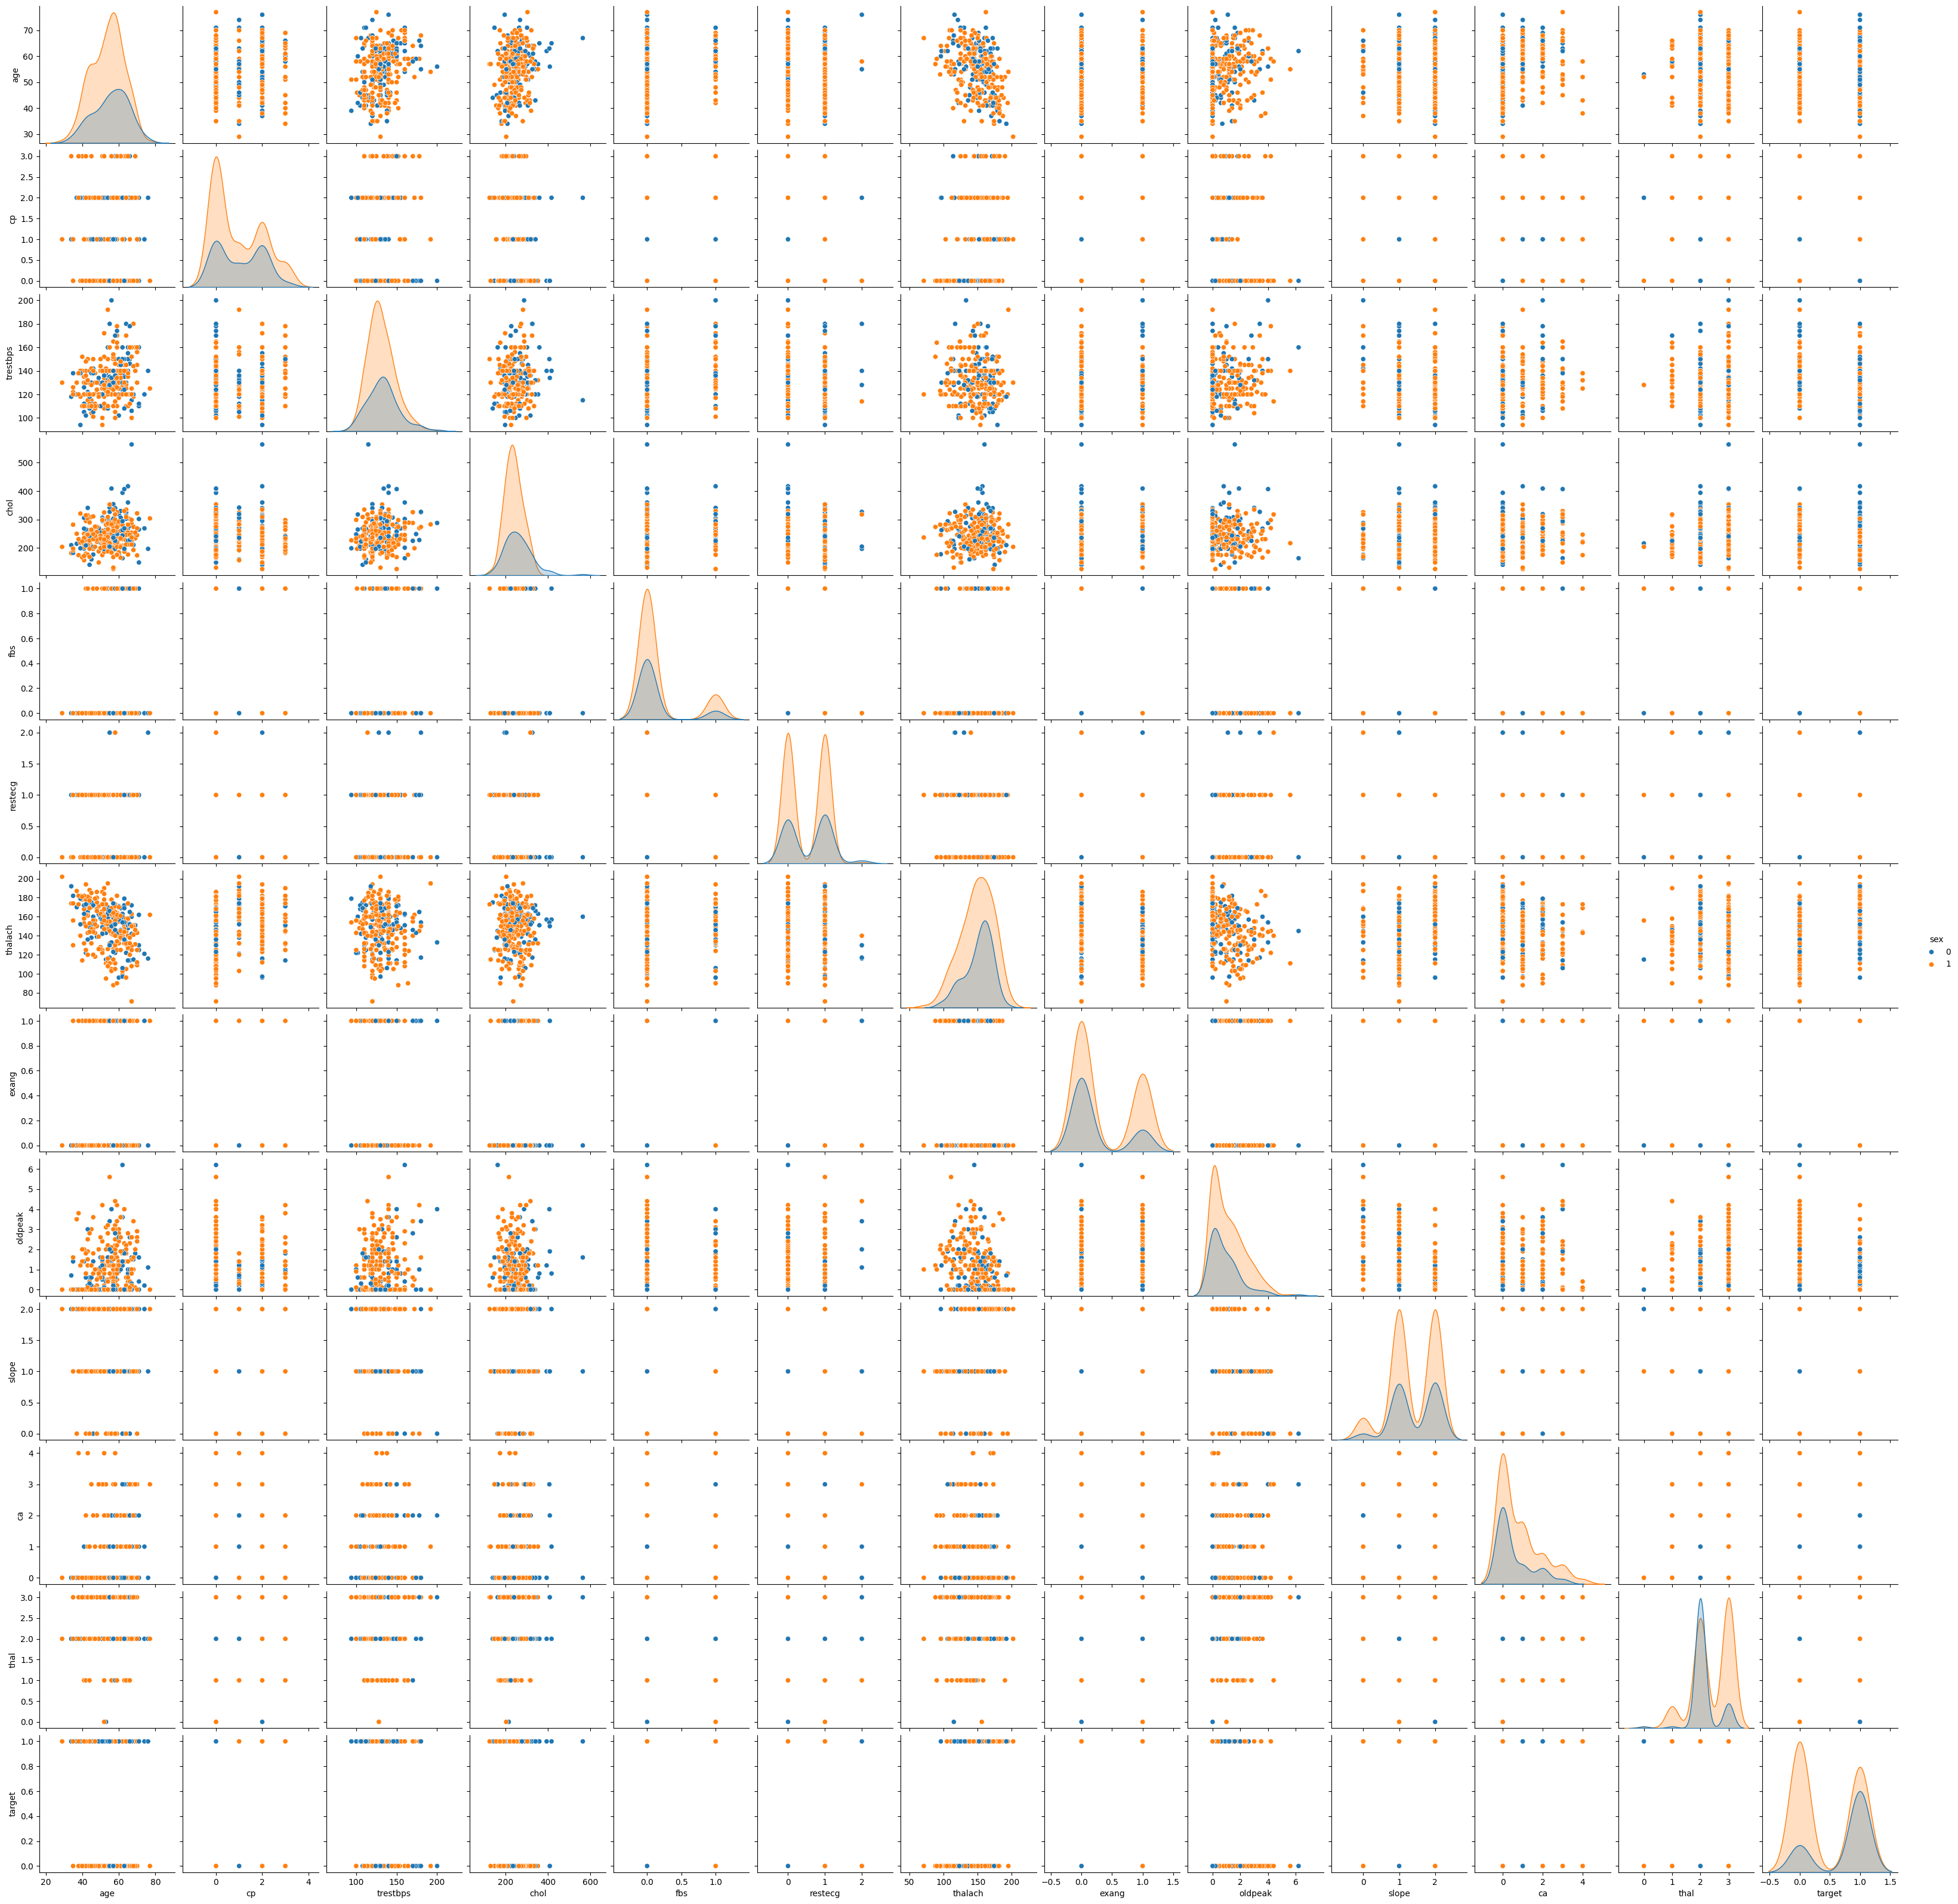

In [ ]:
plt.figure(figsize=(30,30))
sns.pairplot(heart_data,hue='sex')

Creating a heatmap

<Axes: >

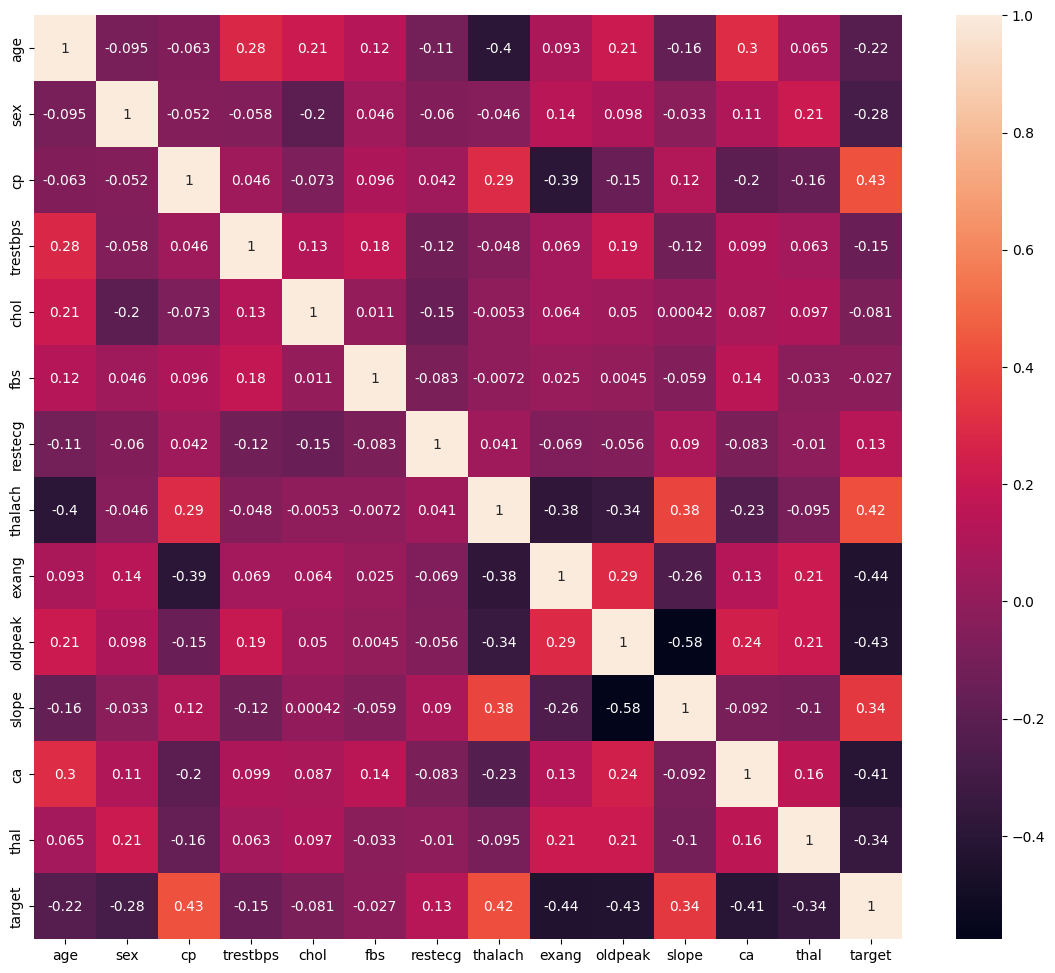

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(heart_data.corr(),annot=True)

Creating bar plot between the number of people who had heart attack and different type of chest pain

Text(0, 0.5, 'Count')

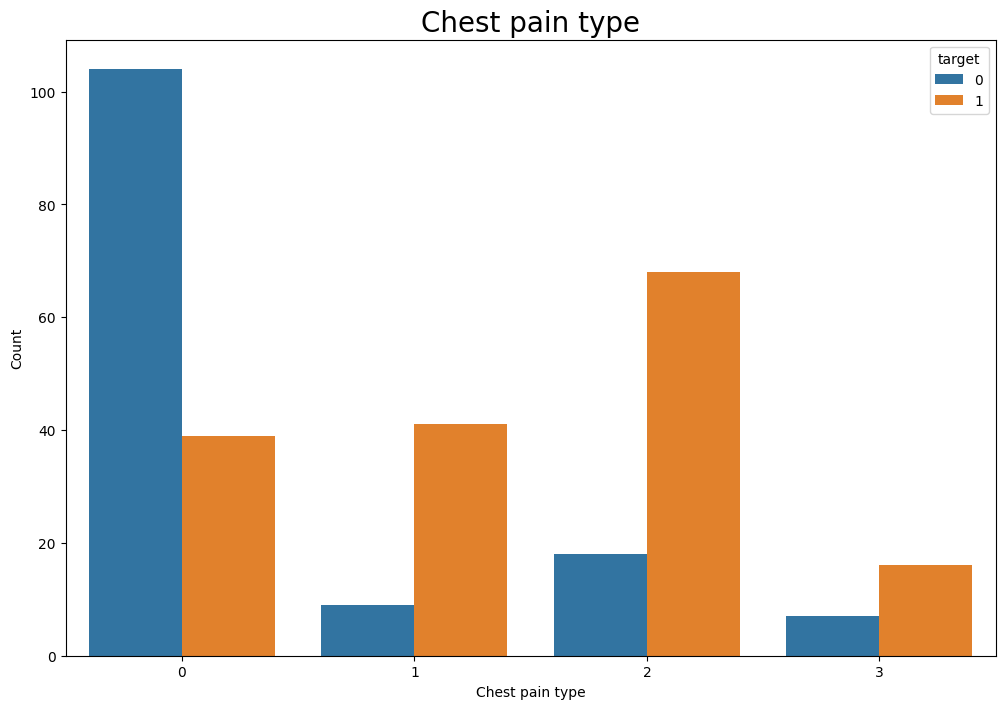

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='cp',hue='target',data=heart_data)
plt.title("Chest pain type",size=20)
plt.xlabel("Chest pain type",size=10)
plt.ylabel("Count",size=10)

Creating bar plot between the number of people who had heart attack and fasting blood sugar

Text(0, 0.5, 'Count')

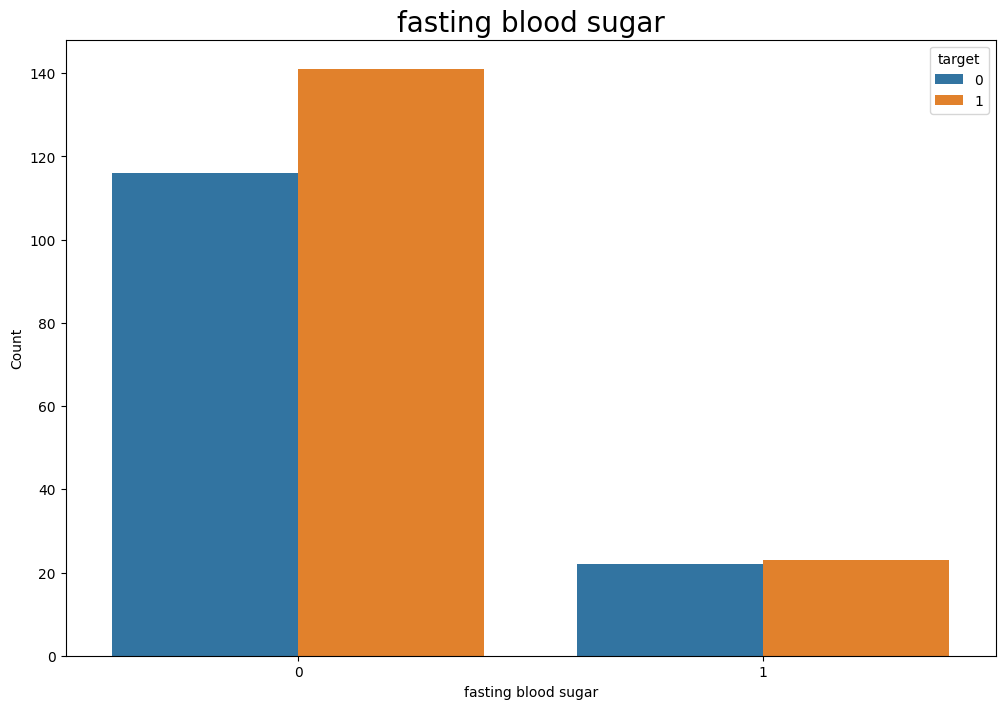

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='fbs',hue='target',data=heart_data)
plt.title("fasting blood sugar",size=20)
plt.xlabel("fasting blood sugar",size=10)
plt.ylabel("Count",size=10)

**People having more than 120 fasting blood sugar have more chance of heart attack**

Creating bar plot between the number of people who had heart attack and resting electrocardiographic results

Text(0, 0.5, 'Count')

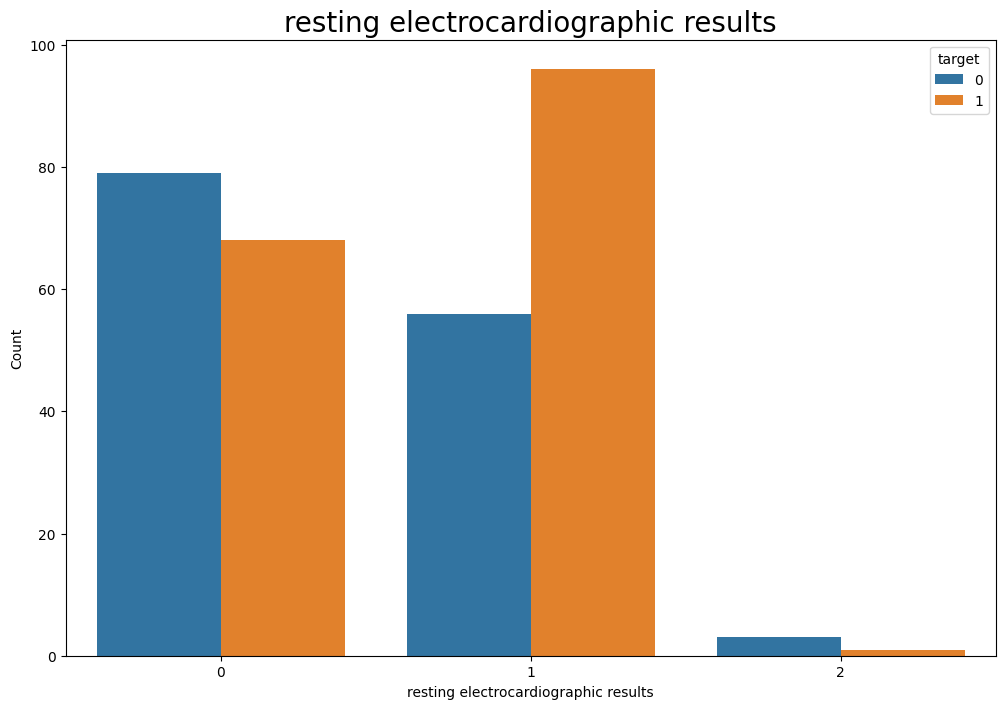

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='restecg',hue='target',data=heart_data)
plt.title("resting electrocardiographic results",size=20)
plt.xlabel("resting electrocardiographic results",size=10)
plt.ylabel("Count",size=10)

Creating bar plot between the number of people who had heart attack and number of major vessels

Text(0, 0.5, 'Count')

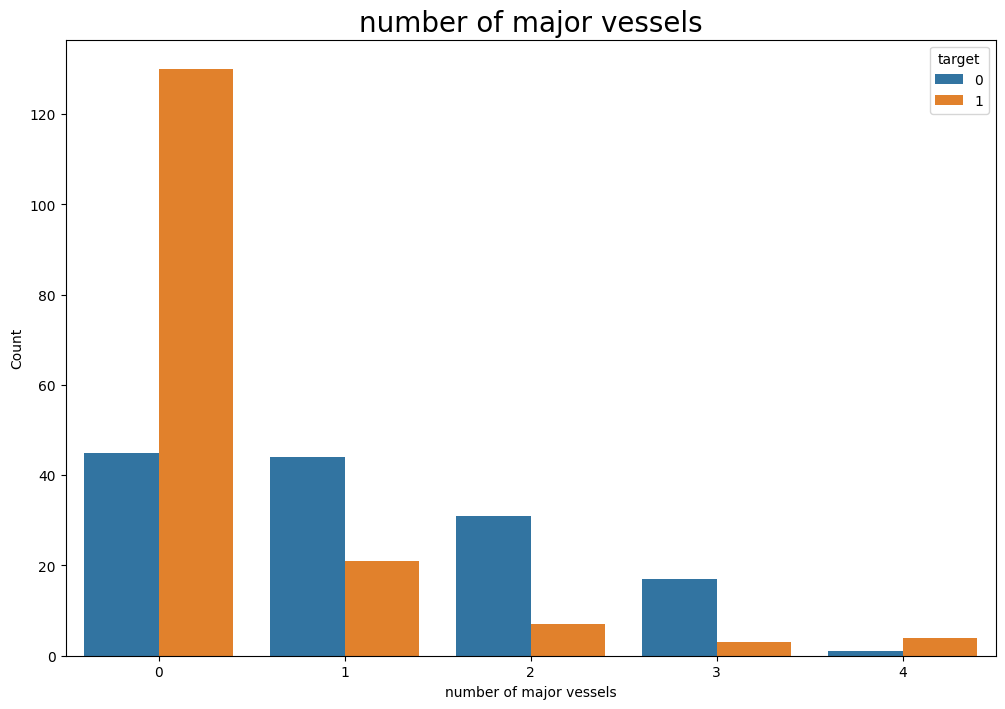

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='ca',hue='target',data=heart_data)
plt.title("number of major vessels",size=20)
plt.xlabel("number of major vessels",size=10)
plt.ylabel("Count",size=10)

**People having zero of major vessels have more chance of heart attack**

Creating bar plot between the number of people who had heart attack and exercised induced angina

Text(0, 0.5, 'Count')

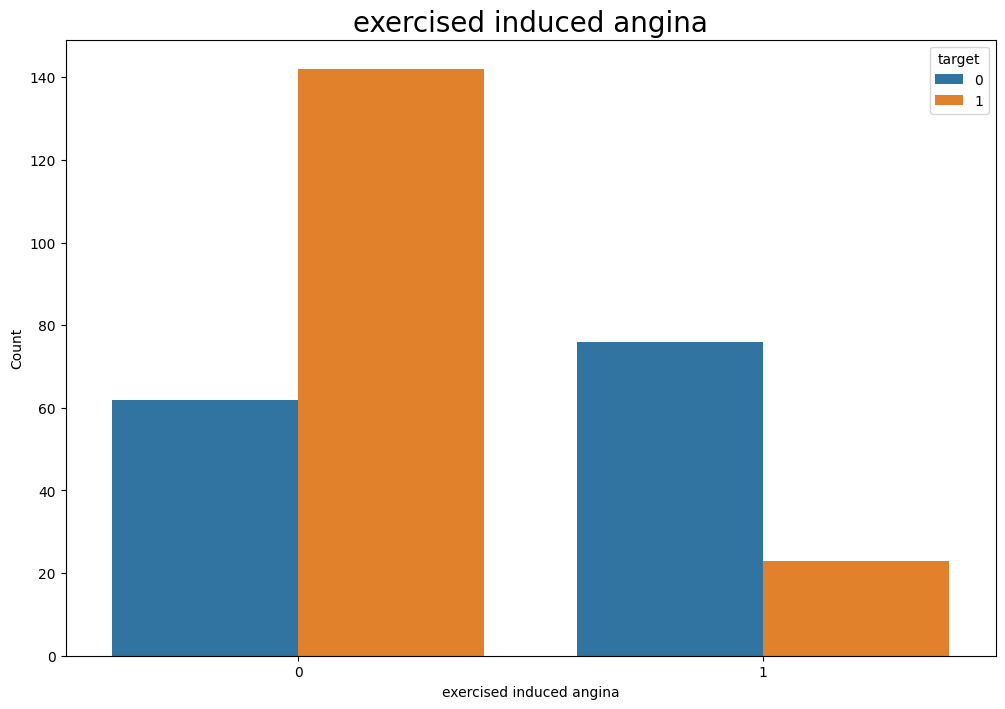

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='exang',hue='target',data=heart_data)
plt.title("exercised induced angina",size=20)
plt.xlabel("exercised induced angina",size=10)
plt.ylabel("Count",size=10)

 **People having zero induced angina have more chance of heart attack **

Creating bar plot between the number of people who had heart attack and gender

Text(0, 0.5, 'Count')

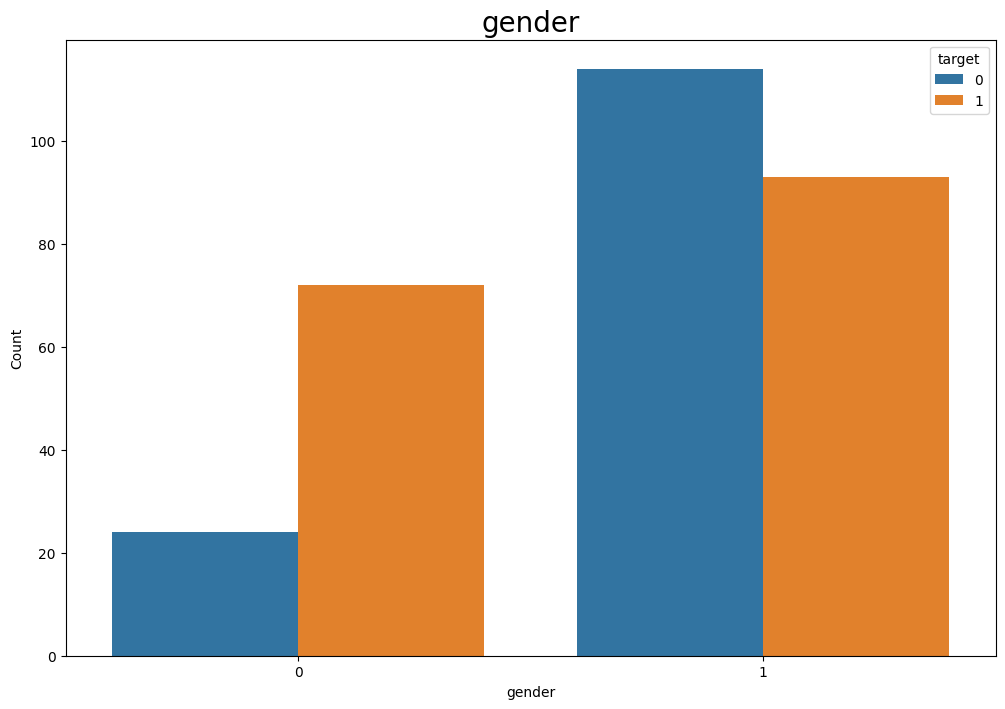

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='sex',hue='target',data=heart_data)
plt.title("gender",size=20)
plt.xlabel("gender",size=10)
plt.ylabel("Count",size=10)

**The chance of heart attack is more in men**

Creating kernel density estimate (KDE) plot between the number of people who had heart attack and their age

Text(0, 0.5, 'Count')

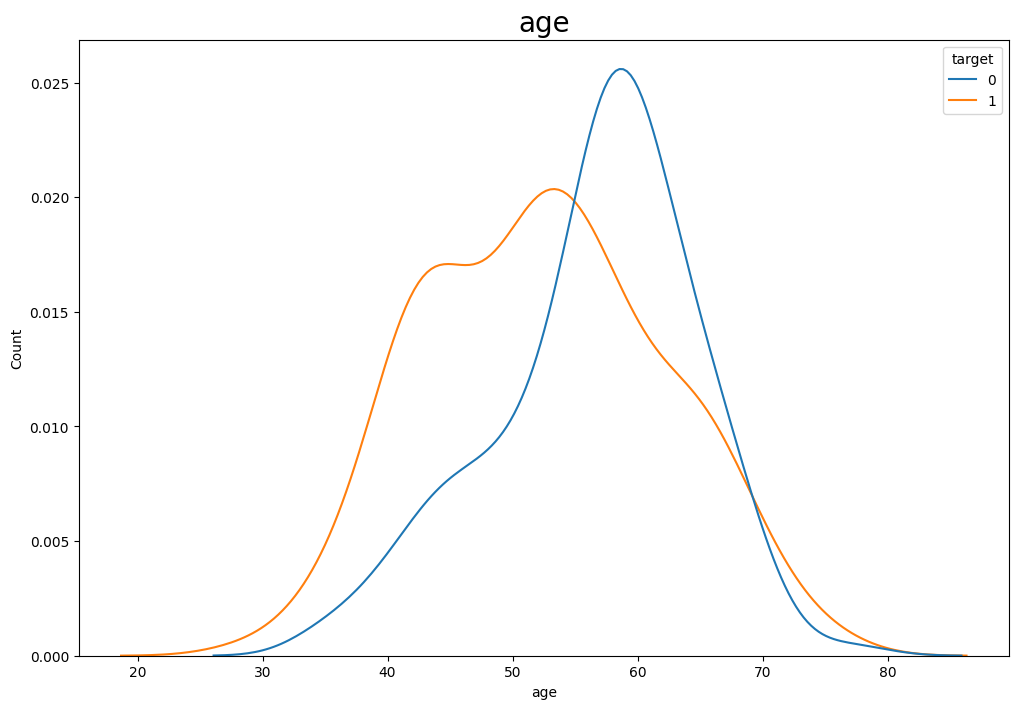

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='age',hue='target',data=heart_data)
plt.title("age",size=20)
plt.xlabel("age",size=10)
plt.ylabel("Count",size=10)

**The chance of heart attack increases from age 30 to age 65:**

Creating kernel density estimate (KDE) plot between the number of people who had heart attack and resting blood pressure

Text(0, 0.5, 'Count')

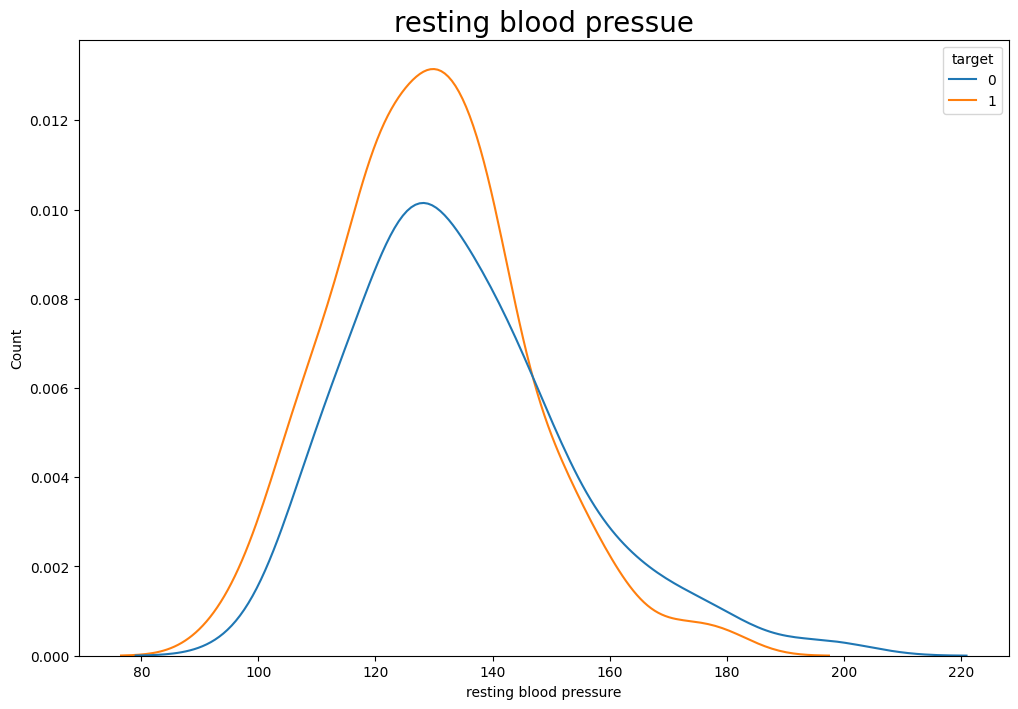

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='trestbps',hue='target',data=heart_data)
plt.title("resting blood pressue",size=20)
plt.xlabel("resting blood pressure",size=10)
plt.ylabel("Count",size=10)

**The chance of heart attack is more when the resting blood pressure approximately between 100-150**

Creating kernel density estimate (KDE) plot between the number of people who had heart attack and cholestrol

Text(0, 0.5, 'Count')

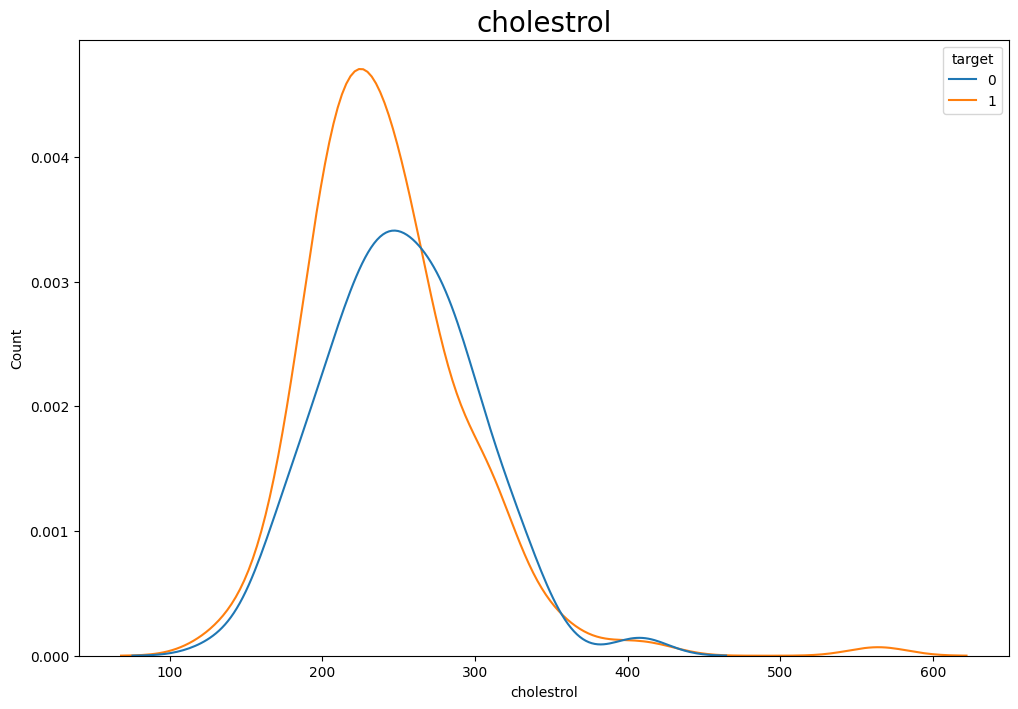

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='chol',hue='target',data=heart_data)
plt.title("cholestrol",size=20)
plt.xlabel("cholestrol",size=10)
plt.ylabel("Count",size=10)

**The chance of heart attack is more when cholestrol is approximately between 150-300**

Splitting the features and target

In [ ]:
X= heart_data.drop(columns='target',axis=1)
Y= heart_data['target']
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the data into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Training the model

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic regression model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Checking the accuracy score


In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,Y_train)
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.8512396694214877


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)
print("Accuracy on test data:",test_data_accuracy)

Accuracy on test data: 0.819672131147541


Building a predictive system

In [ ]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,2,2)
input_data_numpy=np.asarray(input_data, dtype=np.float64)
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The person does not have a heart disease')
else:
    print ('The person has a heart diosease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
